# Projeto Ciência de Dados - Previsão de Vendas


- O presente projeto foi desenvolvido para conseguir realizar uma previsão das vendas de uma empresa fictícia em um determinado período, com base nos gastos em anúncios nas 3 grandes redes que esta investe: TV, Jornal e Rádio.

- Base de Dados: https://drive.google.com/drive/folders/183RgkA6X1X35uYvuiI04XFdBNOqwErb_?usp=sharing

Tabela com os investimentos que foi utilizada para treinar a Inteligência Artificial 
(TV, Radio e Jornal está em MILHARES de reais. Vendas estão em MILHÕES de reais):


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Informações gerais da tabela utilizada: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Gráfico de Calor que demonstra a correlação entre os investimentos e ganhos
(quanto maior a correlação, mais interligados os valores estão):


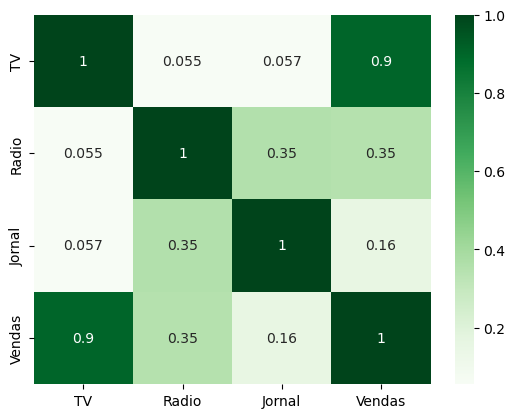

Precisão dos resultados oferecidos pelas IAs utilizadas:
Regressão linear:  0.9071151423684272
Árvore de Decisão:  0.9630072315088477

Visualização gráfica das previsões de cada IA com a coluna Vendas da tabela de testes:


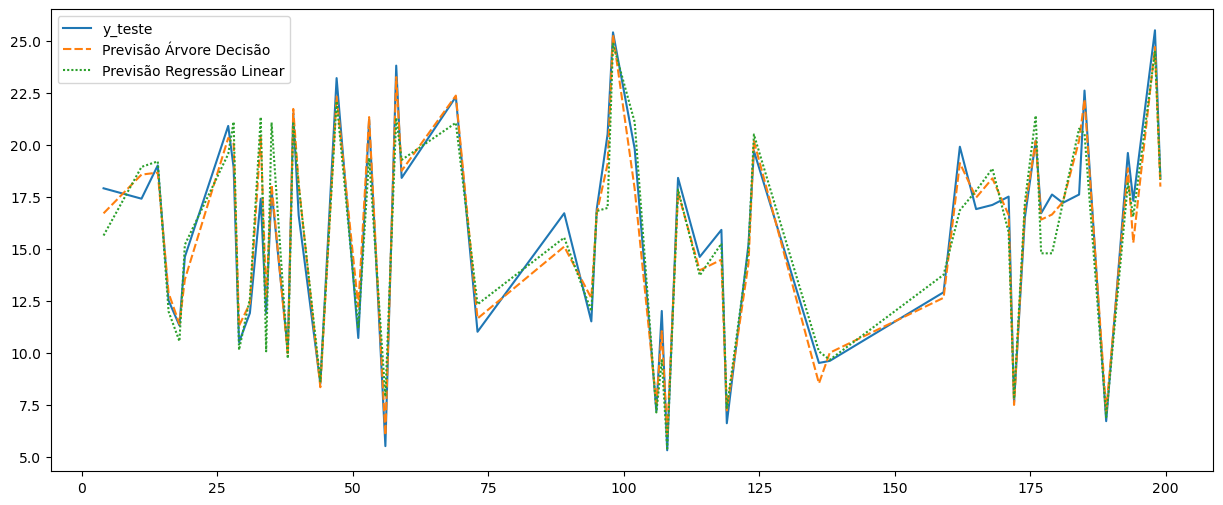


Tabela com os investimentos do mês que deseja-se descobrir os ganhos com as vendas.

Caso 0: foram investidos R$23.100 em TV, R$3.800 em Jornal e R$69.200 em Jornal
Caso 1: foram investidos R$44.500 em TV, R$0 em Jornal e R$5.100 em Jornal
Caso 2: foram investidos R$170.200 em TV, R$45.900 em Jornal e R$0 em Jornal


,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


Previsão das vendas para cada caso acima (em MILHÕES de reais) na ordem [0,1,2]:
[ 7.809  8.524 19.961] 



In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

tabela = pd.read_csv("advertising.csv")

print('Tabela com os investimentos que foi utilizada para treinar a Inteligência Artificial \n(TV, Radio e Jornal está em MILHARES de reais. Vendas estão em MILHÕES de reais):')
display(tabela)

print('Informações gerais da tabela utilizada: \n')
tabela.info()

# criar um gráfico
sns.heatmap(tabela.corr(), cmap='Greens', annot = True)

# exibe o gráfico
print('\nGráfico de Calor que demonstra a correlação entre os investimentos e ganhos\n(quanto maior a correlação, mais interligados os valores estão):')
plt.show()

# definição dos valores de teste da IA
y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

# criação das inteligências artificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar as inteligências artificiais
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print('Precisão dos resultados oferecidos pelas IAs utilizadas:')
print("Regressão linear: ", r2_score(y_teste, previsao_regressaolinear))
print("Árvore de Decisão: ", r2_score(y_teste, previsao_arvoredecisao))

# visualização gráfica das previsões
print('\nVisualização gráfica das previsões de cada IA com a coluna Vendas da tabela de testes:')
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsão Árvore Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

# nova tabela com os investimentos do mês para cada setor
print('\nTabela com os investimentos do mês que deseja-se descobrir os ganhos com as vendas.')
nova_tabela = pd.read_csv("novos.csv")

print('\nCaso 0: foram investidos R$23.100 em TV, R$3.800 em Jornal e R$69.200 em Jornal')
print('Caso 1: foram investidos R$44.500 em TV, R$0 em Jornal e R$5.100 em Jornal')
print('Caso 2: foram investidos R$170.200 em TV, R$45.900 em Jornal e R$0 em Jornal')
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)

# previsão de vendas a partir da nova tabela
print('Previsão das vendas para cada caso acima (em MILHÕES de reais) na ordem [0,1,2]:')
print(previsao, "\n")